# Exemplo de análise topológica de dados sobre uma matriz de distancias

In [53]:
import numpy as np

# Define o tamanho da matriz
n = 19

# Inicializa a matriz densa com zeros
distance_matrix = np.zeros((n, n))

# Gera pesos aleatórios entre 1 e 10 para as entradas fora da diagonal principal

for i in range(n):
    for j in range(n):
        if i > j:
            distance_matrix[i, j] = np.random.uniform(1, 10)  # valor aleatório entre 1 e 10
            distance_matrix[j, i] = distance_matrix[i, j]


distance_matrix
# Agora distance_matrix é uma matriz numpy simetrica com zeros na diagonal


array([[0.        , 2.38477682, 5.63377718, 6.41513722, 4.45845574,
        9.82861686, 4.60068238, 9.7623404 , 7.85795574, 2.33743799,
        5.60464616, 6.90700253, 2.12085992, 6.74061173, 2.23657555,
        1.94522384, 4.90130454, 6.55572376, 2.41407479],
       [2.38477682, 0.        , 9.09856275, 8.64045459, 6.09979592,
        8.23082951, 5.12595691, 2.06260912, 8.20669942, 5.82660054,
        1.72484561, 9.98330512, 7.04017304, 3.77160063, 2.42654409,
        9.01162051, 1.36445801, 7.57296628, 7.96503918],
       [5.63377718, 9.09856275, 0.        , 8.00386096, 7.48884752,
        5.53342164, 2.82543078, 9.46472341, 9.65990082, 2.0905688 ,
        9.41246448, 7.74872262, 1.23994556, 7.42433305, 5.48234178,
        6.18672056, 7.72435563, 4.05722833, 5.24375408],
       [6.41513722, 8.64045459, 8.00386096, 0.        , 9.51207256,
        6.5394672 , 4.71079741, 1.4773475 , 7.69884369, 6.45005383,
        3.5436164 , 8.21977104, 8.57069242, 7.80192085, 8.4368948 ,
        2.831

In [54]:
#Importando a ferramenta mais rapida para calculo de diagramas de persistencia
from ripser import ripser
#Importando ferramenta para plotar o diagrama

from persim import plot_diagrams
import matplotlib.pyplot as plt

In [55]:
#Calculando os diagramas de persistencia homologica
#Por padrao o ripser calcula diagrams para duas dimensoes homologicas, 0 e 1
diagrams = ripser(distance_matrix, distance_matrix=True)['dgms']
diagrams

[array([[0.        , 1.00053811],
        [0.        , 1.12133586],
        [0.        , 1.23994553],
        [0.        , 1.25028443],
        [0.        , 1.30063319],
        [0.        , 1.30427122],
        [0.        , 1.32326674],
        [0.        , 1.36445796],
        [0.        , 1.37020338],
        [0.        , 1.39631116],
        [0.        , 1.43831229],
        [0.        , 1.47734749],
        [0.        , 1.51480997],
        [0.        , 1.65706384],
        [0.        , 1.72484565],
        [0.        , 1.81634724],
        [0.        , 1.94522381],
        [0.        , 3.03502631],
        [0.        ,        inf]]),
 array([[4.03690243, 4.60329056],
        [4.02963114, 4.30300188],
        [3.76517797, 4.45845556],
        [3.54361629, 5.26753044],
        [3.47463274, 4.29620743],
        [2.8311739 , 4.71079731],
        [2.62961245, 2.82055116],
        [2.6203568 , 2.91256213],
        [2.42346907, 4.60068226],
        [2.38477683, 2.42654419],
        [2.3

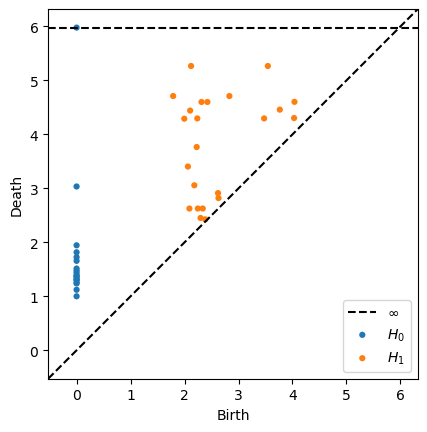

In [56]:
#Plotamos os resultados dos dois diagramas em uma mesma janela. Em azul, mostramos a evolução das componentes conexas(dim = 0).
#Em laranja, mostramos a evolução dos "buracos" de dimensão 1
# Esta é a assinatura topológica da matriz
plot_diagrams(
    diagrams,
    show=True,
)

In [57]:
#Precisamos transformar a assinatura topologica acima para uma outra que possamos realizar cálculo de medias.
from persim.landscapes import PersLandscapeExact
from persim.landscapes import plot_landscape_simple
from persim.landscapes import PersistenceLandscaper

<Axes: title={'center': 'Degree 1 Persistence Landscape'}>

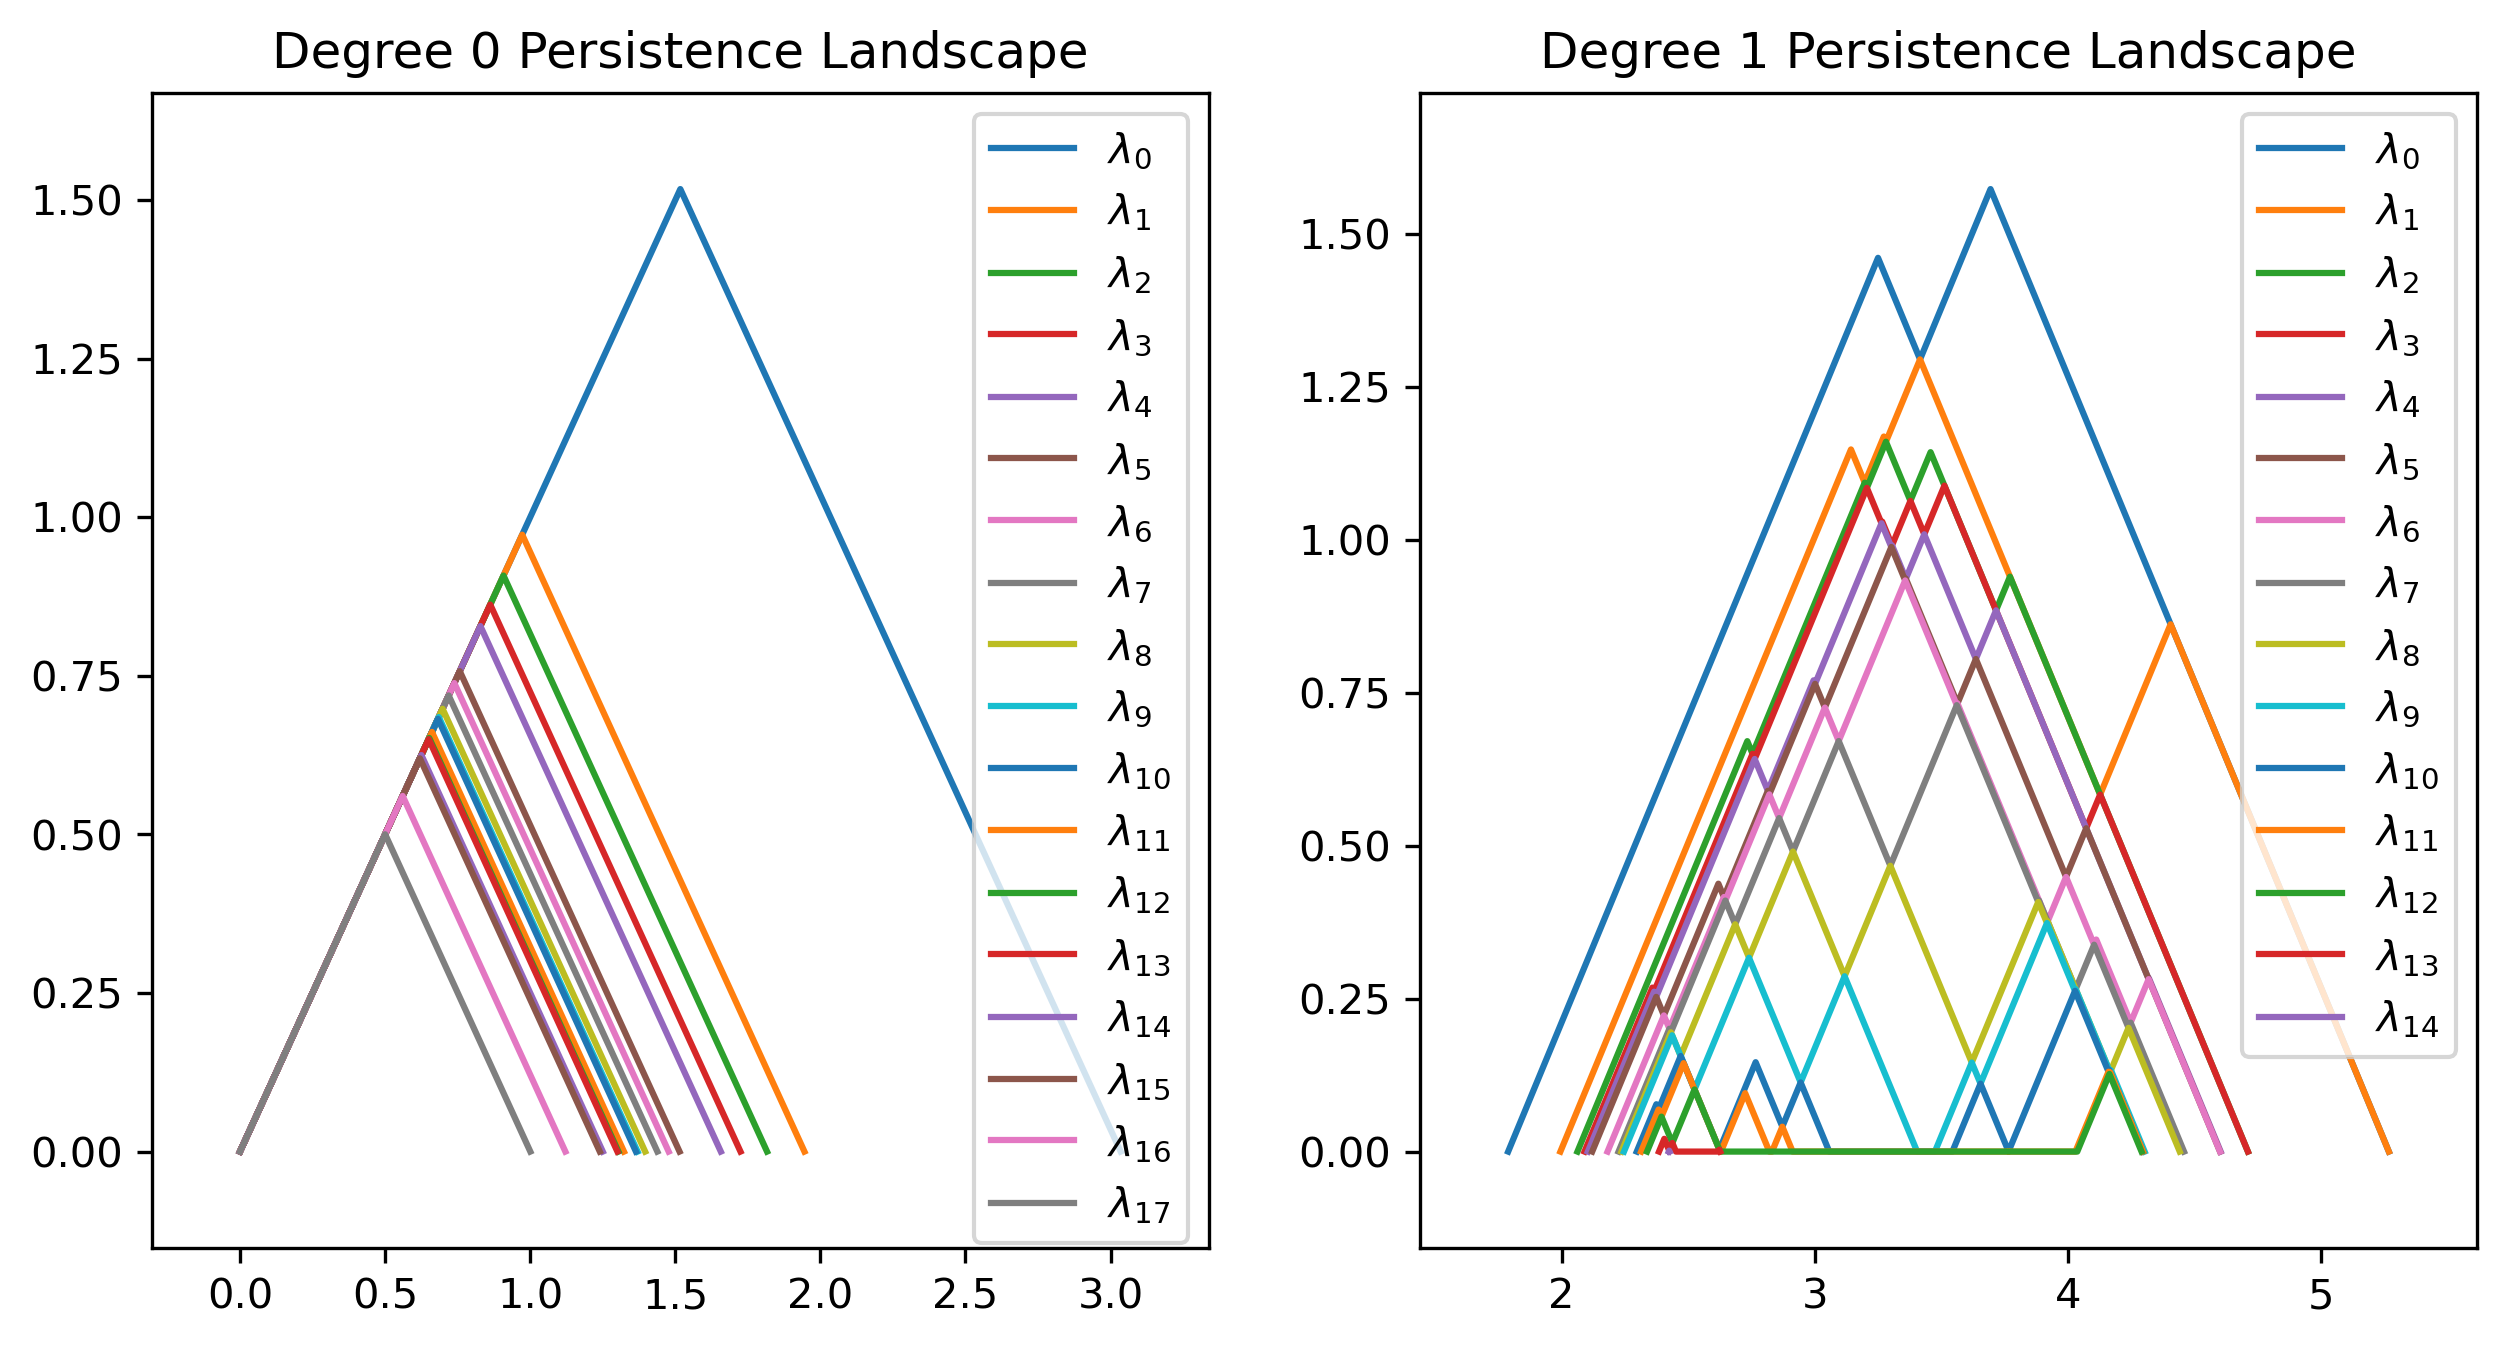

In [58]:
# Plot persistence landscapes
fig, axs = plt.subplots(1, 2, dpi=300)
fig.set_size_inches(10, 5)

plot_landscape_simple(PersLandscapeExact(diagrams, hom_deg=0),
                             title="Degree 0 Persistence Landscape", ax=axs[0])

plot_landscape_simple(PersLandscapeExact(diagrams, hom_deg=1),
                            title="Degree 1 Persistence Landscape", ax=axs[1])